In [ ]:
import pandas as pd
import numpy as np

## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'

Без использования merge!

In [ ]:
%%capture
!wget tr_types https://www.dropbox.com/s/5deipwkmeial1ba/tr_types.csv
!wget tr_mcc_codes = https://www.dropbox.com/s/xwbkjwik600clsh/tr_mcc_codes.csv 
!wget gender_train = https://www.dropbox.com/s/qc307hdkc9jdxf8/gender_train.csv 
!wget transactions = https://www.dropbox.com/s/axkihywa8q118rk/transactions.csv

In [ ]:
transactions = pd.read_csv("transactions.csv", sep=",", nrows=1000000)

In [ ]:
tr_types_sample = transactions['tr_type'].sample(n=1000, random_state=1)

In [ ]:
tr_types = pd.read_csv("tr_types.csv", sep=";")

In [ ]:
temp_tr_types = tr_types.loc[(tr_types.tr_type.isin(tr_types_sample))]
temp_tr_types = temp_tr_types.loc[temp_tr_types.tr_description.str.contains('POS|АТМ', regex=True)]
len(tr_types_sample.loc[tr_types_sample.isin(temp_tr_types.tr_type)])/len(tr_types_sample)

0.608

## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [ ]:
groups = transactions.groupby(['tr_type'])
freq_tr_types = groups.size()
freq_tr_types.sort_values(ascending=False, inplace=True)
top_freq_tr_types = list(freq_tr_types.head(10).index)
tr_types.loc[tr_types['tr_type'].isin(top_freq_tr_types)]

,tr_type,tr_description
39,7010,Взнос наличных через АТМ (в своем тер.банке)
47,7030,Перевод на карту (с карты) через АТМ (в предел...
59,7070,Перевод на карту (с карты) через Мобильный бан...
60,7071,Перевод на карту (с карты) через Мобильный бан...
98,1010,Покупка. POS ТУ СБ РФ
99,1030,Оплата услуги. Банкоматы СБ РФ
100,1100,Покупка. ТУ Россия
101,1110,Покупка. POS ТУ Россия
106,2010,Выдача наличных в АТМ Сбербанк России
129,2370,Списание с карты на карту по операции <перевод...


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

In [ ]:
first_customer_id = transactions.loc[transactions['amount'] > 0].groupby(['customer_id'])['amount'].sum().sort_values(ascending=False).head(1).index.item()
first_customer_id

70780820

In [ ]:
second_customer_id = transactions.loc[transactions['amount'] < 0].groupby(['customer_id'])['amount'].sum().sort_values(ascending=True).head(1).index.item()
second_customer_id

70780820

In [ ]:
first_customer_ser = transactions.loc[transactions['customer_id'] == first_customer_id]['amount']
abs(first_customer_ser[first_customer_ser > 0].sum() + first_customer_ser[first_customer_ser < 0].sum())

1837317.980000019

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'week_amount')

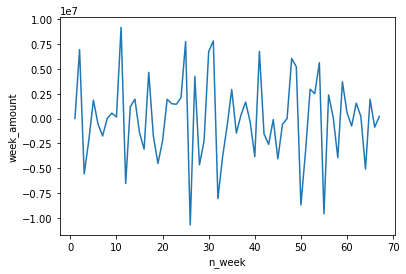

In [ ]:
new_df = transactions.loc[transactions['customer_id'] == second_customer_id][['tr_datetime', 'customer_id', 'amount']]
new_df.tr_datetime = new_df['tr_datetime'].str.split().str.get(0)
new_df = new_df.groupby(['tr_datetime'])['amount'].sum()
week_amount = new_df.groupby(np.arange(len(new_df)) // 7).sum().values
week_amount = np.insert(week_amount, 0, 0, axis=0)
n_weeks = np.arange(1, len(week_amount) + 1)

plt.plot(n_weeks, week_amount)
plt.xlabel('n_week')
plt.ylabel('week_amount')

## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [ ]:
tr_groups = transactions[['tr_type', 'amount']].loc[transactions['tr_type'].isin(top_freq_tr_types)].groupby(['tr_type'])
tr_groups.mean()

,amount
tr_type,
1010,-19784.748640
1030,-5320.980222
1100,-44061.827262
1110,-32119.330371
2010,-136077.629325
2370,-205418.249032
7010,276391.789596
7030,86104.332909
7070,65569.831700


In [ ]:
tr_groups.median()

,amount
tr_type,
1010,-7411.52
1030,-2245.92
1100,-10188.26
1110,-11207.57
2010,-44918.32
2370,-44918.32
7010,112295.79
7030,13951.52
7070,11319.42


In [ ]:
tr_customer_groups = transactions[['tr_type', 'amount', 'customer_id']].\
    loc[transactions['customer_id'].isin([first_customer_id, second_customer_id])].groupby(['customer_id', 'tr_type'])

In [ ]:
tr_customer_groups.mean()

amount
customer_id tr_type              
54871257    1010    -4.416506e+04
            1030    -1.903366e+04
            1100    -1.807962e+04
            1110    -7.717905e+04
            2010    -4.502637e+05
            2011    -5.440107e+05
            2020    -3.544629e+06
            2110    -1.066810e+05
            2330    -4.929340e+05
            2331    -7.586204e+05
            2370    -4.357385e+05
            2371    -5.612563e+05
            4010    -6.902448e+03
            4051    -7.586206e+03
            4071    -4.727519e+03
            4110    -3.368877e+03
            4500    -3.481169e+04
            7010     1.135792e+06
            7011     4.491830e+03
            7021     5.545472e+05
            7030     9.348624e+05
            7031     3.671511e+05
            7070     1.358207e+06
            7071     3.660094e+05
95481247    1010    -4.257072e+04
            1030    -6.446933e+03
            1100    -1.550802e+04
            1110    -3.914070e+04
            1200    -7.244027e+03
            2010    -2.464893e+05
            2330    -6.737747e+04
            2370    -1.786905e+05
            2371    -1.347550e+05
            4041    -8.590633e+02
            4071    -1.347550e+03
            6110     1.834913e+04
            6200     6.957510e+03
            7010     8.922411e+05
            7020     5.109458e+04
            7021     1.195950e+05
            7030     1.199069e+05
            7031     1.920258e+05
            7070     1.933949e+05
            7071     1.936340e+05

In [ ]:
tr_customer_groups.median()

amount
customer_id tr_type             
54871257    1010      -19202.580
            1030      -22459.160
            1100      -14036.975
            1110      -29982.980
            2010     -336887.370
            2011     -449183.150
            2020    -1572141.040
            2110     -106681.000
            2330     -336887.370
            2331     -505331.050
            2370     -269509.890
            2371     -363838.355
            4010       -6737.750
            4051       -5053.310
            4071       -3638.385
            4110       -2245.920
            4500      -34811.695
            7010      999432.520
            7011        4491.830
            7021      554547.150
            7030      640085.995
            7031      333518.490
            7070      269509.890
            7071      289049.360
95481247    1010      -14901.655
            1030       -2245.920
            1100      -12105.490
            1110      -27751.880
            1200       -5832.645
            2010     -179673.260
            2330      -67377.470
            2370      -67377.470
            2371     -134754.950
            4041        -892.750
            4071       -1347.550
            6110       18349.130
            6200        7137.630
            7010      673774.730
            7020       59516.765
            7021      126894.245
            7030       94328.460
            7031       97697.340
            7070       85344.800
            7071       58393.810

## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
gender_train = pd.read_csv("gender_train.csv", sep=',')

In [ ]:
tr_mcc_codes = pd.read_csv("tr_mcc_codes.csv", sep=';')

In [ ]:
merged_df = pd.merge(transactions, gender_train, how='left')
merged_df = pd.merge(merged_df, tr_mcc_codes, how='inner')
merged_df = pd.merge(merged_df, tr_types, how='inner')
merged_df.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [ ]:
spending1 = merged_df[['gender', 'amount']].loc[(merged_df['gender'] == 1) & (merged_df['amount'] < 0)]['amount'].mean()
spending2 = merged_df[['gender', 'amount']].loc[(merged_df['gender'] == 0) & (merged_df['amount'] < 0)]['amount'].mean()
abs(abs(spending1) - abs(spending2))

32718.05492021877

In [ ]:
income1 = merged_df[['gender', 'amount']].loc[(merged_df['gender'] == 1) & (merged_df['amount'] > 0)]['amount'].mean()
income2 = merged_df[['gender', 'amount']].loc[(merged_df['gender'] == 0) & (merged_df['amount'] > 0)]['amount'].mean()
abs(abs(income1) - abs(income2))

63366.57104801515

## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [ ]:
max_income = merged_df[['tr_type', 'gender', 'amount']].loc[merged_df['amount'] > 0 ].groupby(['gender', 'tr_type']).max()
temp_df = max_income.sort_values(['gender','amount']).groupby('gender').head(10)
temp_df

amount
gender tr_type           
0.0    4051       1122.96
       4110       2245.92
       4210       2245.92
       2370       2335.75
       4100       5041.86
       7075       6737.75
       2110      22459.16
       1010      24839.83
       2010      44918.32
       2210      68315.82
1.0    2020       2245.92
       4110       2245.92
       1010      28803.87
       8100      64682.37
       6000      79280.83
       7041      87590.72
       2010      89836.63
       2110     112295.79
       2370     113194.15
       7015     121279.45

In [ ]:
times_tr_type = temp_df.groupby('tr_type').size()
logical_results = times_tr_type == 2
list(times_tr_type[logical_results].index)

[1010, 2010, 2110, 2370, 4110]

## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 5 категорий с самыми большими относительными модулями разности в тратах для разных полов.

In [ ]:
sum_spendings_mcc_code = merged_df[['mcc_code', 'gender', 'amount']].loc[merged_df['amount'] < 0].\
    groupby(['gender', 'mcc_code']).sum().reset_index()
sum_spendings_mcc_code

,gender,mcc_code,amount
0,0.0,742,-386207.68
1,0.0,1711,-674897.69
2,0.0,1799,-261626.73
3,0.0,2741,-20746.42
4,0.0,3000,-74431645.27
...,...,...,...
344,1.0,8999,-28643346.63
345,1.0,9222,-988205.17
346,1.0,9311,-373271.22
347,1.0,9399,-1810820.67


## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов. 

In [ ]:
merged_df['tr_hour'] = pd.to_datetime(merged_df['tr_datetime'].str.split().str.get(1), errors='ignore', format='%X').dt.hour

In [ ]:
merged_df[['gender', 'amount', 'tr_hour']].loc[(merged_df['tr_hour'] <= 6) & (merged_df['amount'] < 0)].groupby('gender').size()

gender
0.0    43508
1.0    46693
dtype: int64